# PROJECT OVERVIEW 

In this project, I will focus on data cleaning, imputation, analysis, and visualization to derive valuable insights for a business stakeholder.

## Business Understanding

Our company is diversifying its portfolio by entering new industries, specifically considering the purchase and operation of airplanes for commercial and private use. We are not familiar with the potential risks associated with different aircraft. I have been asked to identify the aircraft with the lowest risk to support this new business venture. 


Additionally, I need to translate my findings into actionable insights for the head of the new aviation division to assist in making informed decisions on aircraft purchases.


## Data

In the data folder, there is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023, covering civil aviation accidents and selected incidents in the United States and international waters. It is up to me to decide which data to use, how to handle missing values, how to aggregate the data, and how to visualize it in an interactive dashboard.

## Key Points

My analysis will yield three specific business recommendations. The primary goal of addressing missing values, aggregating data, and visualizing it is to empower our organization to make informed, data-driven decisions. I will connect my findings to business intelligence by providing recommendations on how the business should proceed with the new aviation opportunity.

Effective communication about my work is crucial. My ability to provide value to the organization—or secure a position within it—depends on how well I can explain what I have done and why it matters. I'll create a compelling narrative for my audience (the head of the aviation division), guiding them through my process and highlighting the key points while omitting less critical details.

I will use plenty of visualizations, as they are essential for exploring data and making my findings accessible to a non-technical audience. I'll spotlight visuals in my presentation, focusing only on those that directly support my recommendations. Simple visuals, such as bar charts and line graphs, are usually the most effective, and I will ensure they are well-formatted with clear labels and titles.

### 1. Setting up our tools for data analysis and creating charts.


- It brings in libraries (think of them as toolkits) that we need.

- pandas helps us manage and analyze data tables.

- numpy is useful for working with numbers and calculations.

- seaborn and matplotlib.pyplot help us create visual charts and graphs to better understand our data.

It also makes sure that any charts or graphs we create will be displayed right in our working area, making it easy to see our results immediately.

In [107]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2 Loading data 

In [108]:

aviation_df= pd.read_csv(r'data/AviationData.csv',encoding='Windows-1252')


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 3 Inspection of the data
Inspect the imported data and verify its structure and content.

. head()- to display the first 5 rows

.shape -  to return a tuple that represents the dimensions of the DataFrame

.columns - to return a list of column names in the DataFrame 

.info() - quick assessment of the completeness of the dataset and understanding the types of data it contains.

.describe() - descriptive statistics for the numerical columns in the DataFrame

.tail() - last 5 rows 

#### 3.1 Head


In [109]:

aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### 3.2 Shape


In [110]:

aviation_df.shape

(88889, 31)

#### 3.3 Columns


In [111]:

aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

#### 3.4 Info

In [112]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### 3.5 Descriptive analysis

In [113]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


#### 3.6 Tail

In [114]:
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


### 4. Data cleaning and Handling 

#### 4.1 Checking for null values

I'm checking each column of my DataFrame, aviation_df, for missing values and getting a count of how many missing values there are in each column.

In [115]:
#checking for null values 
aviation_df.isna().sum() #returns the sum of null values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Only Event.Id , Investigation.Type , Accident.Number , Event.Date  columns have no missing values

#### 4.2 Event.Id will be my primary key for the analysis

Check any duplicates in the Event.Id and drop them, created a function duplicate_count to get that sum and 
event_id_cleaned for the cleaned Event.Id

In [116]:
#i will use Event.Id as my primary key
duplicate_count = aviation_df.duplicated(subset='Event.Id').sum()

#drop duplicates in event id 
event_id_cleaned = aviation_df.drop_duplicates(subset='Event.Id')

Duplicates in Event.Id dropped 

#### 4.3 Dropping columns

These columns will not be useful in this data analysis. 
Created a function columns_to_drop and had them (columns)  there 

In [117]:
columns_to_drop=['Accident.Number', 'Event.Date', 'Location', 'Country',
'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'FAR.Description',
'Schedule', ]

In [118]:
df_cleaned = aviation_df.drop(columns= columns_to_drop)

Created another Function df_cleaned that will be final DataFrame.  
Contains columns that i will use for the analysis 

#### 4.4 Inspection

This is general inspection of the new DataFrame

In [119]:
#inspection of the cleaned data 
df_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Air.carrier',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [120]:
df_cleaned.head()

,Event.Id,Investigation.Type,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the inspection, Aircraft.Category has to cleaned too.

Lets move to that

#### 4.5 Handling Aircraft.Category

Filling NaN values in Aircraft.Category. Grouped the Make and Aircraft.Category 

In [121]:
def fill_nan_aircraft_category(aviation_df):
    def fill_mode_or_unknown(series):
        mode = series.mode()
        if not mode.empty:
            return series.fillna(mode[0])
        else:
            return series.fillna('Unknown')

    aviation_df['Aircraft.Category'] = aviation_df.groupby('Make')['Aircraft.Category'].apply(fill_mode_or_unknown).reset_index(level=0, drop=True)
    return aviation_df


#### 4.6 Dealing with null values

In [122]:
#check for null values
df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

Returns the sum of all null values in the columns 

Filling Null Values

For the columns with numerics, I preffred filling them with median 

For those with categorical values, I went ahead with mode 

In [123]:

# Fill numerical columns with mean or median
df_cleaned['Total.Fatal.Injuries'].fillna(df_cleaned['Total.Fatal.Injuries'].median(), inplace=True)
df_cleaned['Total.Serious.Injuries'].fillna(df_cleaned['Total.Serious.Injuries'].median(), inplace=True)
df_cleaned['Total.Minor.Injuries'].fillna(df_cleaned['Total.Minor.Injuries'].median(), inplace=True)
df_cleaned['Total.Uninjured'].fillna(df_cleaned['Total.Uninjured'].median(), inplace=True)
df_cleaned['Number.of.Engines'].fillna(df_cleaned['Number.of.Engines'].median(), inplace=True)


# Fill categorical columns with mode
df_cleaned['Make'].fillna(df_cleaned['Make'].mode()[0], inplace=True)
df_cleaned['Model'].fillna(df_cleaned['Model'].mode()[0], inplace=True)
df_cleaned['Investigation.Type'].fillna(df_cleaned['Investigation.Type'].mode()[0], inplace=True)
df_cleaned['Injury.Severity'].fillna(df_cleaned['Injury.Severity'].mode()[0], inplace=True)
df_cleaned['Aircraft.damage'].fillna(df_cleaned['Aircraft.damage'].mode()[0], inplace=True)
df_cleaned['Amateur.Built'].fillna(df_cleaned['Amateur.Built'].mode()[0], inplace=True)
df_cleaned['Engine.Type'].fillna(df_cleaned['Engine.Type'].mode()[0], inplace=True)
df_cleaned['Purpose.of.flight'].fillna(df_cleaned['Purpose.of.flight'].mode()[0], inplace=True)
df_cleaned['Weather.Condition'].fillna(df_cleaned['Weather.Condition'].mode()[0], inplace=True)
df_cleaned['Broad.phase.of.flight'].fillna(df_cleaned['Broad.phase.of.flight'].mode()[0], inplace=True)
df_cleaned['Report.Status'].fillna(df_cleaned['Report.Status'].mode()[0], inplace=True)

# Drop columns with high missing values or not relevant
df_cleaned.drop(columns=['Air.carrier', 'Publication.Date'], inplace=True)

# Fill 'Aircraft.Category' using the custom function
df_cleaned = fill_nan_aircraft_category(df_cleaned)

# Check remaining missing values
print(df_cleaned.isna().sum())


Event.Id                  0
Investigation.Type        0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64


Returns the sum of null values, Looks like we don't have any 

Inspection of the number of columns remaining now 

In [124]:
df_cleaned.shape

(88889, 18)

In [125]:
df_cleaned.head()

,Event.Id,Investigation.Type,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,Fatal(4),Destroyed,Airplane,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,Fatal(3),Destroyed,Airplane,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,Fatal(1),Destroyed,Airplane,Cessna,501,No,1.0,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


Looks good!!

### 5 Visualization 

But before that, we had a few discrepancies in the Make column.

 Question, Is CESSNA not same as Cessna?
 I thought so
 
 Lets get that out of the way

In [126]:
#dealing with duplicates in categories, they are all the same thing
df_cleaned['Make'] = df_cleaned['Make'].str.upper()

That is done 

#### 5.1 Bar Graph of Top 10 Aircraft Models with Most Accidents

Lets get to see what we have here 

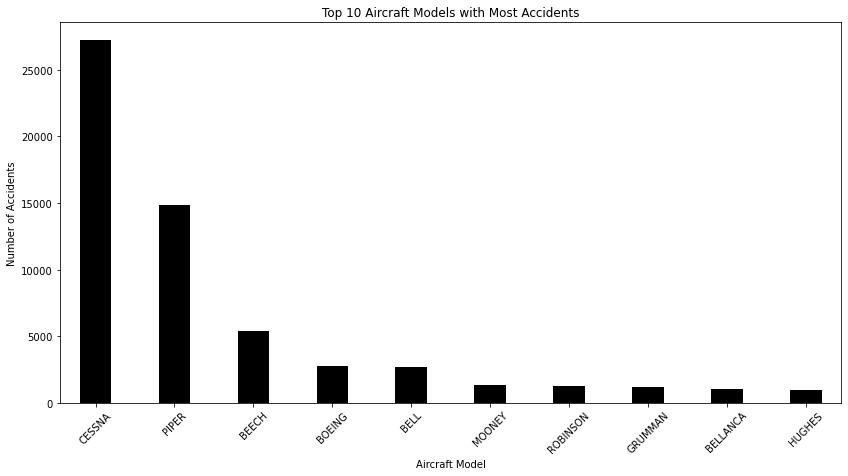

In [127]:
# Grouping by 'Model' and counting accidents
accidents_by_model = df_cleaned['Make'].value_counts()

# Selecting the top 10 models with the most accidents
top_10_models = accidents_by_model.head(10)

# Plotting
plt.figure(figsize=(14, 7))
top_10_models.plot(kind='bar', color='black', width=0.4)
plt.title('Top 10 Aircraft Models with Most Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


Cessna has the most Accidents 

#### 5.2 Fatality Rates by Aircraft Model{Cessna}

From 5.1 above we have seen that Cessna has the most accidents. 
Not all Cessna are bad though.

Lets take a look 

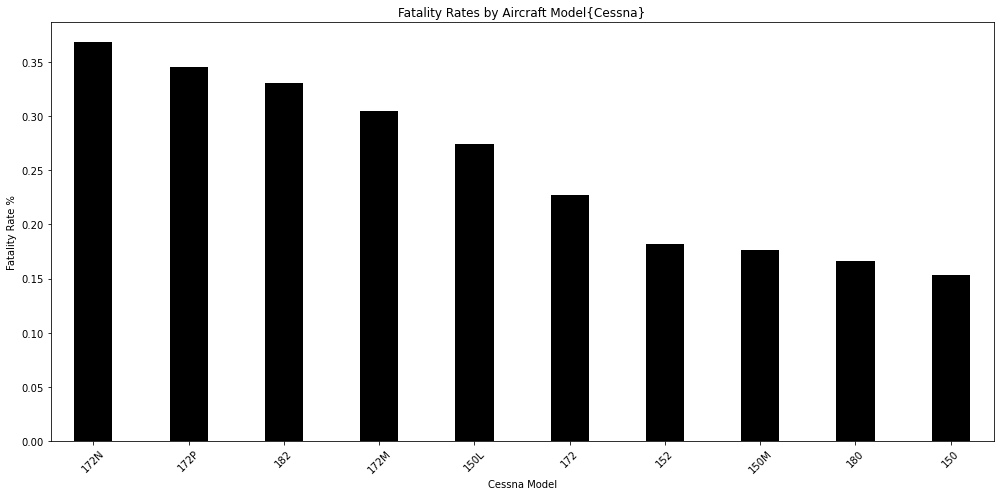

In [128]:
#Fatality Rates by Aircraft Model{Cessna}

# Filter data for 'Cessna' models
cessna_data = df_cleaned[df_cleaned['Make'] == 'CESSNA']

# Calculate the number of accidents for each Cessna model
accidents_by_model = cessna_data['Model'].value_counts().head(10)

# Calculate the total number of fatal injuries for each Cessna model
fatalities_by_model = cessna_data.groupby('Model')['Total.Fatal.Injuries'].sum()

# Calculate the fatality rate (total fatal injuries / number of accidents)
fatality_rate = (fatalities_by_model / accidents_by_model).dropna().sort_values(ascending=False)

# Plot the fatality rates for Cessna models
plt.figure(figsize=(14, 7))
plt.title('Fatality Rates by Aircraft Model{Cessna}')
fatality_rate.plot(kind='bar', color='black', width= 0.4)
plt.xlabel('Cessna Model')
plt.ylabel('Fatality Rate %')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


Cessna 172N has the most Fatality as apposed to Cessna 150

#### 5.3 Technical Understanding

At what point does this accidents though?

 The phase of flight wiss answer this.

 Lets take a look! 

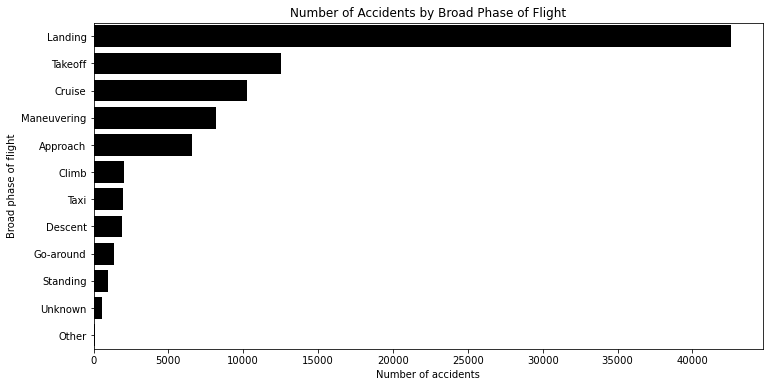

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, y='Broad.phase.of.flight', order=df_cleaned['Broad.phase.of.flight'].value_counts().index, color='black') 
plt.title('Number of Accidents by Broad Phase of Flight')
plt.xlabel('Number of accidents')
plt.ylabel('Broad phase of flight')
plt.show()

Oh wow! During landing is when the most crashes happen. 

This ironically interesting 

### 6. Final 

We now have to convert back to csv for more detailed visualizations 

In [130]:
#covert back to csv 
aviation_df.to_csv("df_cleaned.csv", sep=';', columns=['Event.Id', 'Investigation.Type', 'Injury.Severity', 'Aircraft.damage',
'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries',
'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',],
 na_rep='NA', encoding='utf-8', index=False)

Conversion

In [131]:
pwd

'd:\\project\\Data\\phase-one-project'

Precise location on my computer 